In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the Data
df = pd.read_csv('KNN_Project_Data.csv')

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA   
0  1636.670614   817.988525  2565.995189  358.347163   550.417491  \
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC   
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088  \
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

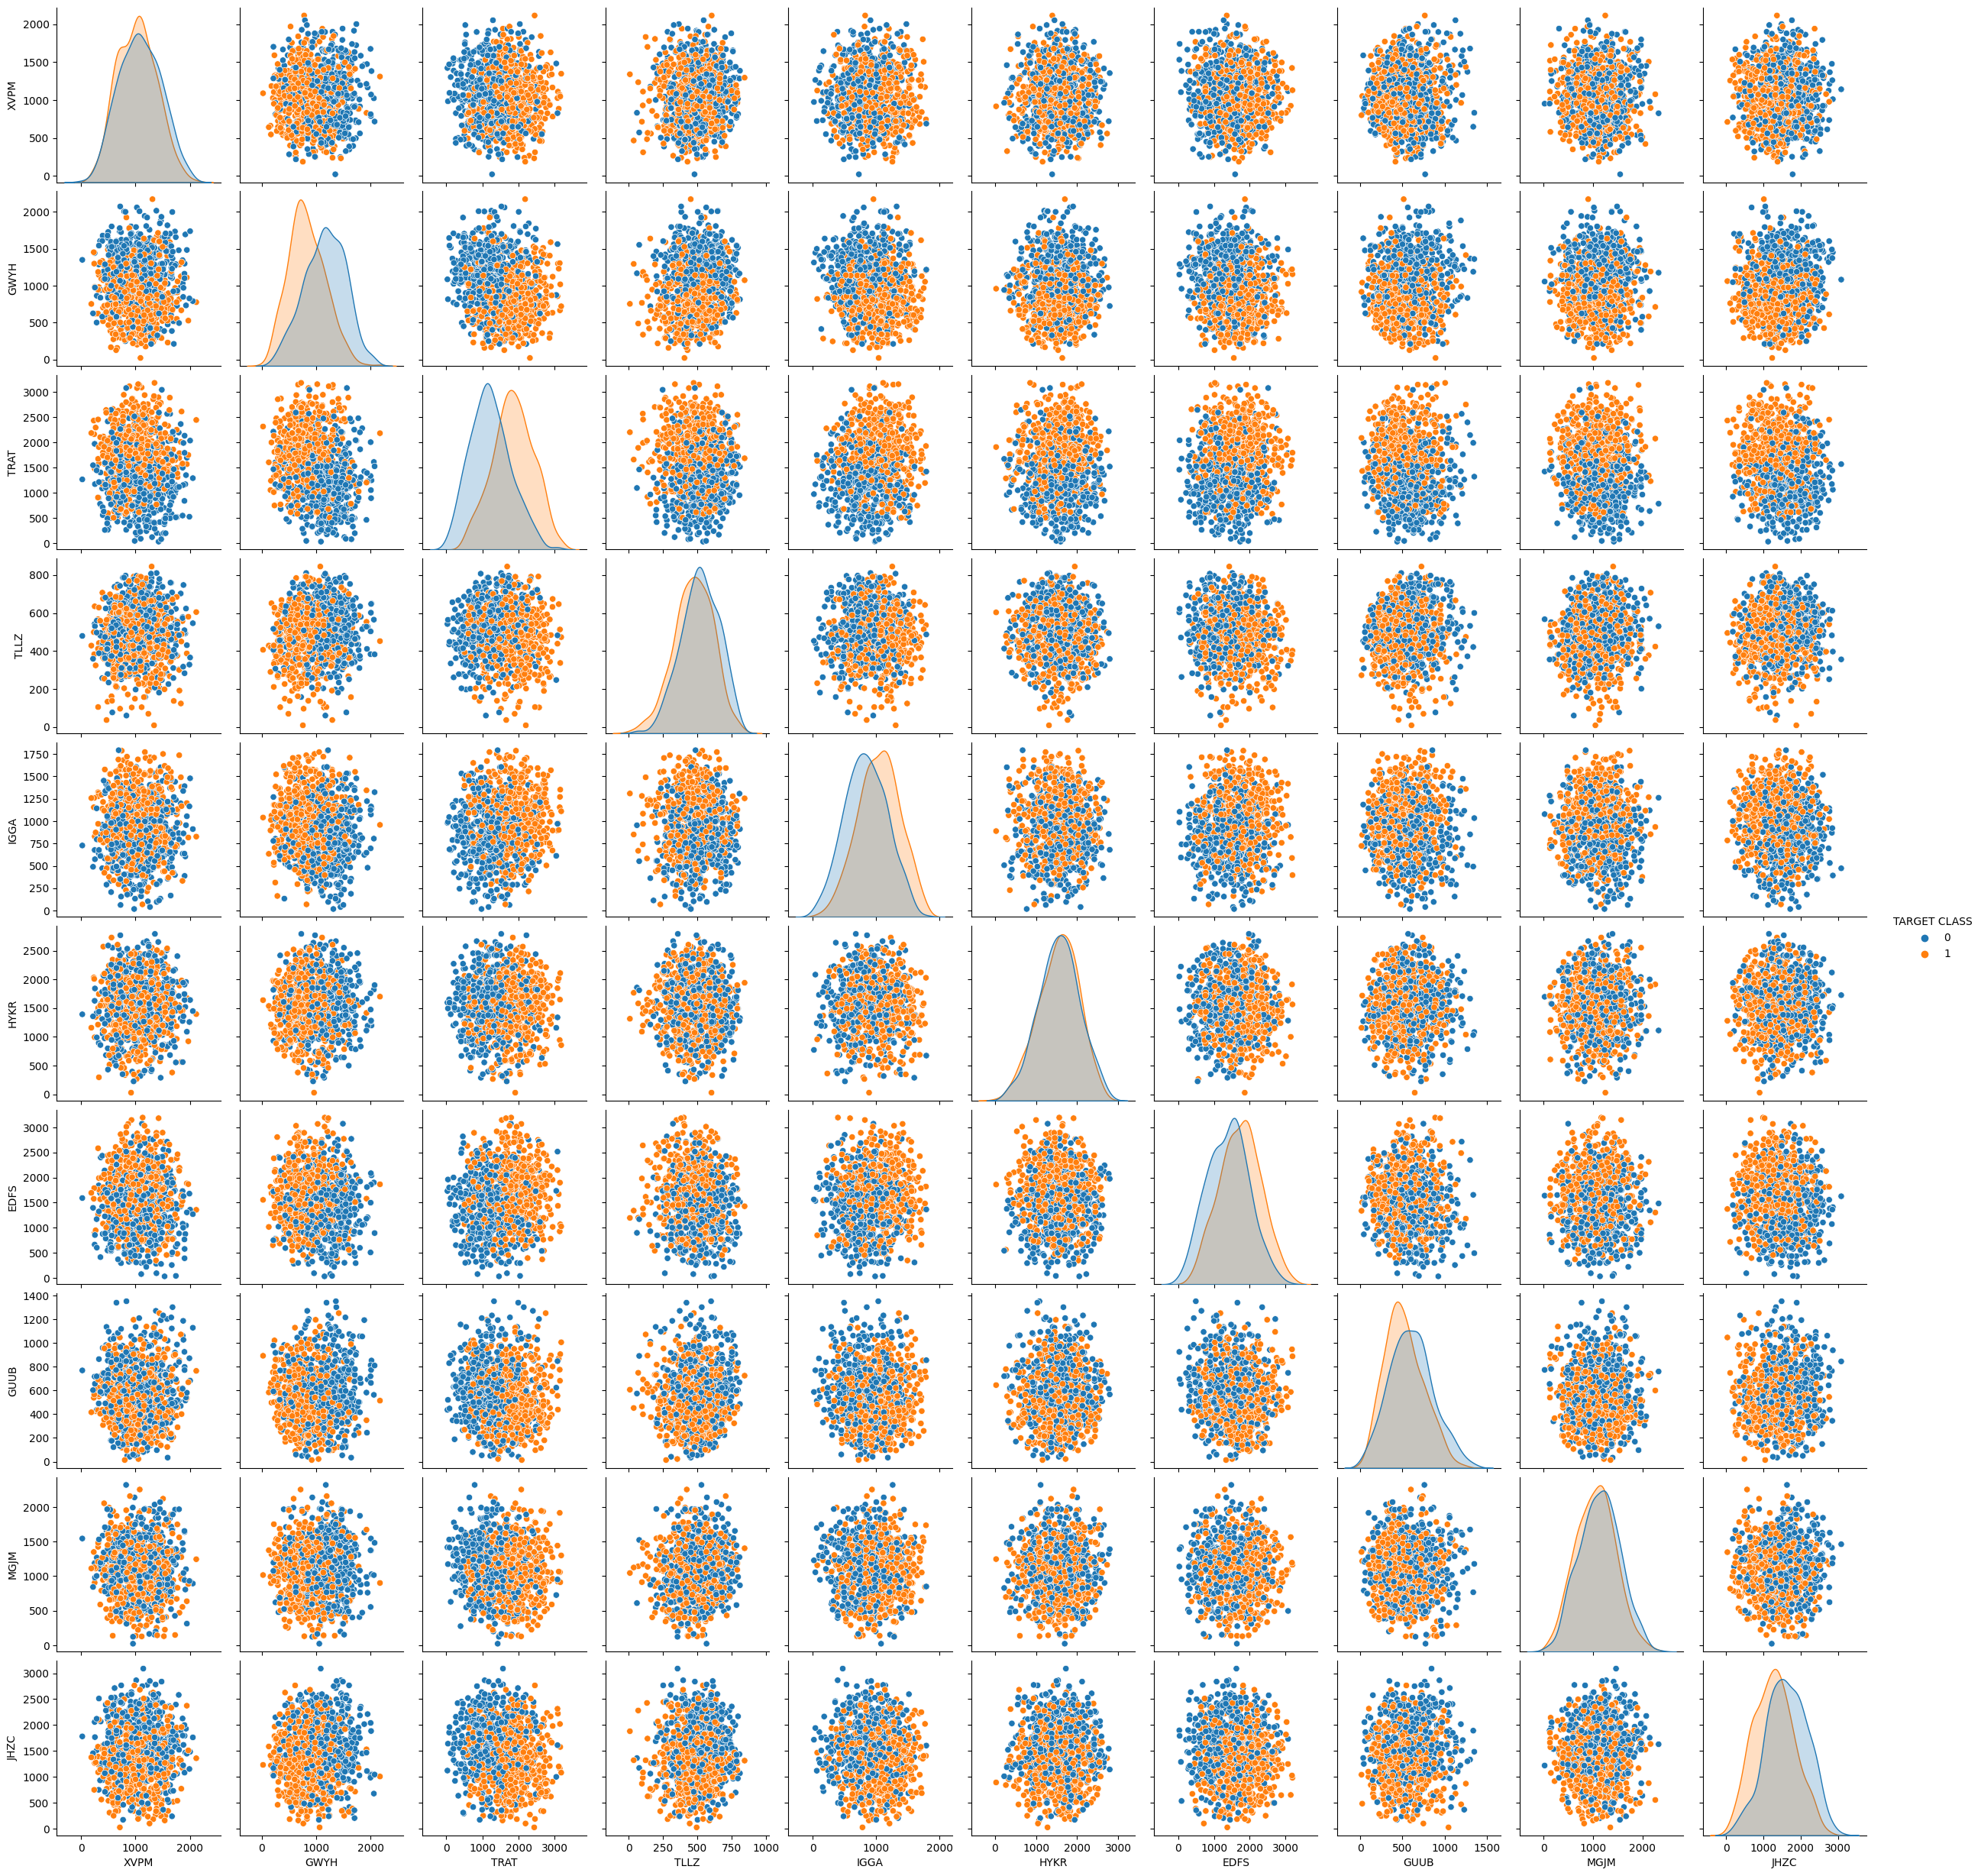

In [5]:
sns.pairplot(data=df,hue='TARGET CLASS')

In [6]:
# Standardize the Variable
from sklearn.preprocessing import StandardScaler

In [7]:
# Create a StandardScaler() object called scaler.
scaler = StandardScaler()

In [8]:
#Fit scaler to the features. 
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
# transform the features to a scaled version.
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
# Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS   
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493  \
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], 
                                                    test_size=0.3)

In [17]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Predictions and Evaluations
predictions = knn.predict(X_test)

In [ ]:
# a confuc